In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr
from pandas import DataFrame
from datetime import date

Air Pollution Forecasting
The Air Quality dataset.

This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.

The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. The complete feature list in the raw data is as follows:

No: row number
year: year of data in this row
month: month of data in this row
day: day of data in this row
hour: hour of data in this row
pm2.5: PM2.5 concentration
DEWP: Dew Point
TEMP: Temperature
PRES: Pressure
cbwd: Combined wind direction
Iws: Cumulated wind speed
Is: Cumulated hours of snow
Ir: Cumulated hours of rain
We can use this data and frame a forecasting problem where, given the weather conditions and pollution for prior hours, we forecast the pollution at the next hour.

In [2]:
data_1 = pd.read_csv("LSTM-Multivariate_pollution.csv")
data_2 = pd.read_csv("pollution_test_data1.csv")

columns_1 = data_1.columns
columns_2 = data_2.columns

list_1 = list(columns_1)
list_2 = list(columns_2)
print(list_1)
print(list_2)
print(len(list_1))
print(len(list_2))
#adding an index to the dataframe
laenge = len(data_1["snow"])
index_liste = []
for i in range (0,laenge):
    index_liste.append(i)
data_1["index"] = index_liste

['date', 'pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
['dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain', 'pollution']
9
8


In [3]:
print("Maximaler Wert des Schnees: "+str(data_1.snow.max()))
print("MAximaler Wer des Regens: "+str(data_1.rain.max()))

t = data_1["rain"]
t = list(t)
zahl = 0
i = 0
stelle = 0
for element in t:
    i += 1
    #print(i)
    if element > zahl:
        zahl = element
        stelle = i
print("Gefundener maximaler Wert:"+str(zahl))
print("Stelle des maximalen Wertes"+str(stelle))

print("Testen der Werte um den Wert herum: "+str(data_1.loc[6223].rain)+"; "+str(data_1.loc[6224].rain))

Maximaler Wert des Schnees: 27
MAximaler Wer des Regens: 36
Gefundener maximaler Wert:36
Stelle des maximalen Wertes6225
Testen der Werte um den Wert herum: 35; 36


In [4]:
liste_snow=[]
liste_rain = []
for element in data_1["index"]:
    #print(data_1.loc[element])
    zeile = data_1.loc[element]
    #print(zeile["snow"])
    if zeile["snow"]>0:
        liste_snow.append(1)
    else:
        #print("e")
        liste_snow.append(0)
    if zeile["rain"]>0:
        liste_rain.append(1)
    else:
        liste_rain.append(0)
        
data_1["snow_hour"]=liste_snow
data_1["rain_hour"]=liste_rain
data_1

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain,index,snow_hour,rain_hour
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,1,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,3,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0,43795,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0,43796,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0,43797,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0,43798,0,0


In [5]:
date_datetime=pd.to_datetime(data_1["date"])
data_1["date_datetime"]=date_datetime
print(data_1.dtypes)

data_1['weekday'] = data_1['date_datetime'].dt.dayofweek
data_1["day_name"]=data_1['date_datetime'].dt.day_name()
data_1["hour"]=data_1['date_datetime'].dt.hour
data_1["month"]=data_1['date_datetime'].dt.month
print(data_1.columns)

date_1=data_1.loc[50].date_datetime
date_2=data_1.loc[74].date_datetime
d = date_1-date_2
t = d-'-1 days +00:00:00'
print(t)

date                     object
pollution               float64
dew                       int64
temp                    float64
press                   float64
wnd_dir                  object
wnd_spd                 float64
snow                      int64
rain                      int64
index                     int64
snow_hour                 int64
rain_hour                 int64
date_datetime    datetime64[ns]
dtype: object
Index(['date', 'pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd',
       'snow', 'rain', 'index', 'snow_hour', 'rain_hour', 'date_datetime',
       'weekday', 'day_name', 'hour', 'month'],
      dtype='object')
0 days 00:00:00


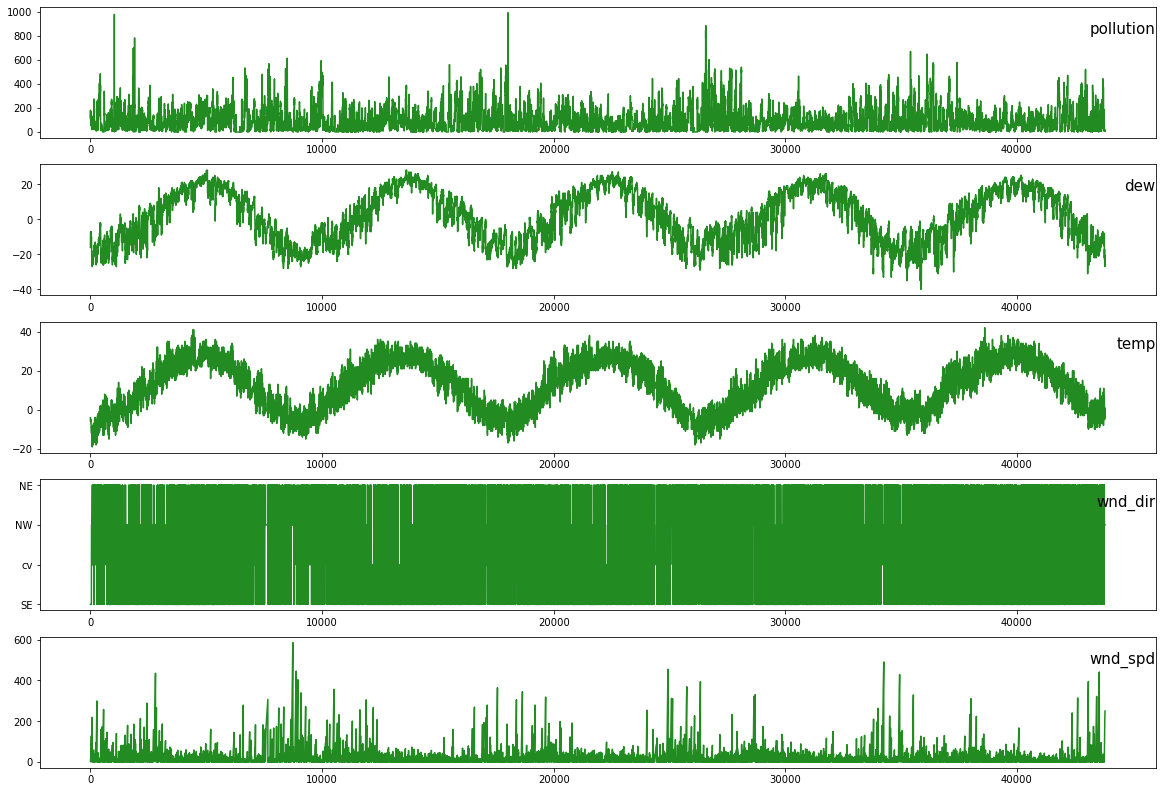

In [6]:
values = data_1.values

# specify columns to plot
groups = [1, 2, 3, 5, 6]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(data_1.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

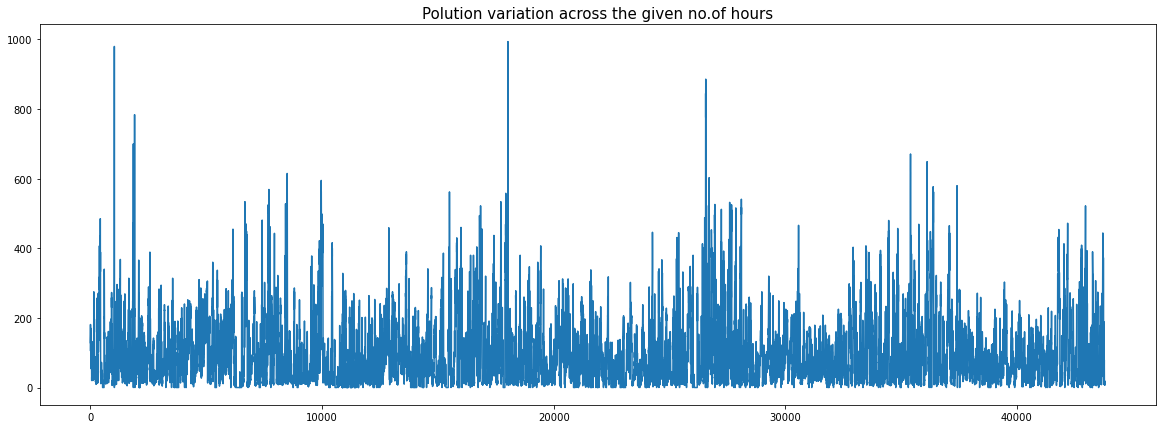

In [7]:
fig = plt.figure(figsize = (20,7))
plt.plot(data_1.pollution)
plt.title("Polution variation across the given no.of hours", fontsize = 15)
plt.show()

In [8]:
data_for_merging_1 = data_1
data_for_merging = data_for_merging_1.drop(['date','snow', 'rain', 'weekday', 'day_name', 'hour', 'month'], axis=1)
data_for_merging

,pollution,dew,temp,press,wnd_dir,wnd_spd,index,snow_hour,rain_hour,date_datetime
0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0,2010-01-02 00:00:00
1,148.0,-15,-4.0,1020.0,SE,2.68,1,0,0,2010-01-02 01:00:00
2,159.0,-11,-5.0,1021.0,SE,3.57,2,0,0,2010-01-02 02:00:00
3,181.0,-7,-5.0,1022.0,SE,5.36,3,1,0,2010-01-02 03:00:00
4,138.0,-7,-5.0,1022.0,SE,6.25,4,1,0,2010-01-02 04:00:00
...,...,...,...,...,...,...,...,...,...,...
43795,8.0,-23,-2.0,1034.0,NW,231.97,43795,0,0,2014-12-31 19:00:00
43796,10.0,-22,-3.0,1034.0,NW,237.78,43796,0,0,2014-12-31 20:00:00
43797,10.0,-22,-3.0,1034.0,NW,242.70,43797,0,0,2014-12-31 21:00:00
43798,8.0,-22,-4.0,1034.0,NW,246.72,43798,0,0,2014-12-31 22:00:00


In [9]:
grouped_sum = data_for_merging.groupby(data_for_merging.date_datetime.dt.date).sum()
grouped_mean = data_for_merging.groupby(data_for_merging.date_datetime.dt.date).mean()
grouped_merged=pd.merge(grouped_mean , grouped_sum, how='left', on='date_datetime')
#y ist dann die sum tabelle
#grouped_merged.columns
#grouped_merged
#data_for_merging.columns

In [10]:
u =grouped_merged.drop([  'index_x',  
       'snow_hour_x', 'rain_hour_x', 'pollution_y', 'dew_y', 'temp_y',
       'press_y', 'wnd_spd_y', 'index_y'], axis=1)
u = u.rename(columns = {"pollution_x":"pollution"})
u

,pollution,dew_x,temp_x,press_x,wnd_spd_x,snow_hour_y,rain_hour_y
date_datetime,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,8,0
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,22,0
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0,0
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0,0
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0,0
...,...,...,...,...,...,...,...
2014-12-27,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0,0
2014-12-28,197.375000,-10.791667,1.583333,1019.958333,10.948750,0,0
2014-12-29,159.000000,-12.333333,0.750000,1013.750000,8.000000,0,0


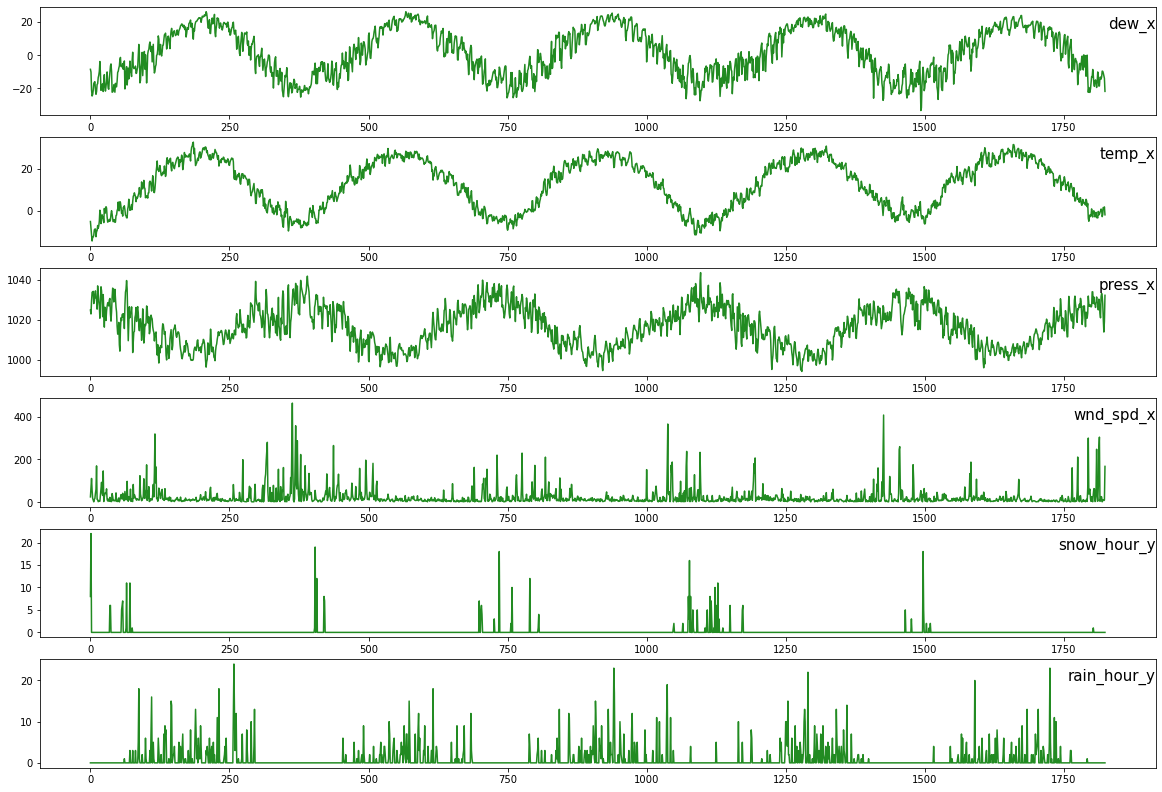

In [11]:
values = u.values

# specify columns to plot
groups = [1, 2, 3,4, 5, 6]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(u.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

In [12]:
#periodizität scheint zu bestehen. Spaltung nach Jahreszeiten scheint notwendig

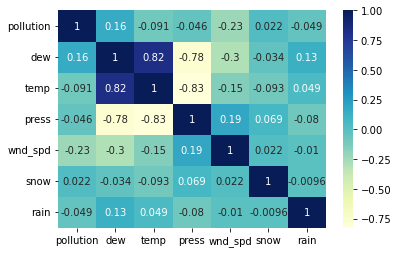

In [13]:
data_original = pd.read_csv("LSTM-Multivariate_pollution.csv")
dataplot = sb.heatmap(data_original.corr(), cmap="YlGnBu", annot=True)

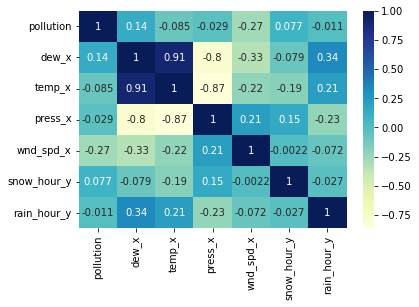

In [14]:
dataplot = sb.heatmap(u.corr(), cmap="YlGnBu", annot=True)

In [15]:


#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(data_1['pollution'], data_1['dew'])

#print Spearman rank correlation and p-value
print(rho)

print(p)


0.26331767232174386
0.0


In [16]:
#baseline modell
baseline = data_1.drop([ "temp", "press", "wnd_spd", "wnd_dir", "snow", "rain"], axis = 1)
baseline_1 = baseline.loc[24:]
#baseline_1=baseline_1.rename(columns={"date" : "date_origin", "pollution":"pollution_origin"})
baseline_1.reset_index()
baseline_2 = baseline.loc[:43775]
baseline_2

,date,pollution,dew,index,snow_hour,rain_hour,date_datetime,weekday,day_name,hour,month
0,2010-01-02 00:00:00,129.0,-16,0,0,0,2010-01-02 00:00:00,5,Saturday,0,1
1,2010-01-02 01:00:00,148.0,-15,1,0,0,2010-01-02 01:00:00,5,Saturday,1,1
2,2010-01-02 02:00:00,159.0,-11,2,0,0,2010-01-02 02:00:00,5,Saturday,2,1
3,2010-01-02 03:00:00,181.0,-7,3,1,0,2010-01-02 03:00:00,5,Saturday,3,1
4,2010-01-02 04:00:00,138.0,-7,4,1,0,2010-01-02 04:00:00,5,Saturday,4,1
...,...,...,...,...,...,...,...,...,...,...,...
43771,2014-12-30 19:00:00,35.0,-8,43771,0,0,2014-12-30 19:00:00,1,Tuesday,19,12
43772,2014-12-30 20:00:00,26.0,-11,43772,0,0,2014-12-30 20:00:00,1,Tuesday,20,12
43773,2014-12-30 21:00:00,20.0,-12,43773,0,0,2014-12-30 21:00:00,1,Tuesday,21,12
43774,2014-12-30 22:00:00,8.0,-21,43774,0,0,2014-12-30 22:00:00,1,Tuesday,22,12


In [17]:
X = baseline_1["pollution"]
y = baseline_2["pollution"]

# Load Package
from sklearn.dummy import DummyClassifier

# Initialize Estimator
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X,y)

# Check for Model Accuracy
dummy_clf.score(X,y)

dummy_clf.predict("09")

array([29., 72.])

In [18]:
test_X = baseline_1["pollution"]
test_y = baseline_2["pollution"]


# persistence model
def model_persistence(x):
	return x
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 10309.986


In [19]:
X = u[['pollution', "dew_x"]]
y = u['pollution']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
#predictedCO2 = regr.predict([[2300, 1300]])

#print(predictedCO2)
model = linear_model.LinearRegression().fit(X, y)

r_sq = model.score(X, y)
r_sq

1.0

In [20]:
#predictions = []
#for idx, row in X.iterrows():
    #print(idx, row['pollution'], row['dew_x'])
    #print(row["pollution"])
#	yhat=model.predict([row["pollution"], row["dew_x"]])
#	predictions.append(yhat)
#test_score = mean_squared_error(y, predictions)
#print('Test MSE: %.3f' % test_score)


In [21]:
jahreszeiten = u
#print(jahreszeiten.dtypes)
jahreszeiten["date"]=jahreszeiten.index
jahreszeiten

,pollution,dew_x,temp_x,press_x,wnd_spd_x,snow_hour_y,rain_hour_y,date
date_datetime,,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,8,0,2010-01-02
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,22,0,2010-01-03
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0,0,2010-01-04
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0,0,2010-01-05
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0,0,2010-01-06
...,...,...,...,...,...,...,...,...
2014-12-27,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0,0,2014-12-27
2014-12-28,197.375000,-10.791667,1.583333,1019.958333,10.948750,0,0,2014-12-28
2014-12-29,159.000000,-12.333333,0.750000,1013.750000,8.000000,0,0,2014-12-29


In [22]:
jahreszeiten["date"]
df = jahreszeiten
date_datetime=pd.to_datetime(jahreszeiten["date"])
jahreszeiten["date_datetime"]=date_datetime

In [23]:
date_1 = date(2012,1,2)
date_1.day

2

In [24]:
df_filtered = jahreszeiten[(jahreszeiten.date < date_1)]
print(df_filtered)

                pollution      dew_x     temp_x      press_x   wnd_spd_x  \
date_datetime                                                              
2010-01-02     145.958333  -8.500000  -5.125000  1024.750000   24.860000   
2010-01-03      78.833333 -10.125000  -8.541667  1022.791667   70.937917   
2010-01-04      31.333333 -20.875000 -11.500000  1029.291667  111.160833   
2010-01-05      42.458333 -24.583333 -14.458333  1033.625000   56.920000   
2010-01-06      56.416667 -23.708333 -12.541667  1033.750000   18.511667   
...                   ...        ...        ...          ...         ...   
2011-12-28     171.791667  -9.666667  -2.625000  1031.500000   14.377500   
2011-12-29      61.375000 -10.583333  -4.708333  1037.958333   22.581250   
2011-12-30     132.791667  -8.750000  -4.083333  1033.541667    5.585833   
2011-12-31     159.000000 -11.791667  -3.666667  1029.000000   11.083333   
2012-01-01      78.958333 -14.958333  -3.375000  1033.000000   14.153333   

           

In [31]:
spring_b1 = date(2010,3,20)
spring_e1 = date(2010,6,22)
spring_b2 = date(2011,3,20)
spring_e2 = date(2011,6,22)
spring_b3 = date(2012,3,20)
spring_e3 = date(2012,6,22)
spring_b4 = date(2013,3,20)
spring_e4 = date(2013,6,22)
spring_b5 = date(2014,3,20)
spring_e5 = date(2014,6,22)

spring_1 = jahreszeiten[(jahreszeiten.date > spring_b1)&(jahreszeiten.date <spring_e1)]
spring_2 = jahreszeiten[(jahreszeiten.date > spring_b2)&(jahreszeiten.date <spring_e2)]
spring_3 = jahreszeiten[(jahreszeiten.date > spring_b3)&(jahreszeiten.date <spring_e3)]
spring_4 = jahreszeiten[(jahreszeiten.date > spring_b4)&(jahreszeiten.date <spring_e4)]
spring_5 = jahreszeiten[(jahreszeiten.date > spring_b5)&(jahreszeiten.date <spring_e5)]
#print(df_filtered)
print(spring_1.shape)
print(spring_2.shape)
print(spring_3.shape)
print(spring_4.shape)
print(spring_5.shape)
spring_all = pd.concat([spring_1, spring_2, spring_3, spring_4, spring_5])
print(spring_all.shape)
spring_all

(93, 9)
(93, 9)
(93, 9)
(93, 9)
(93, 9)
(465, 9)


,pollution,dew_x,temp_x,press_x,wnd_spd_x,snow_hour_y,rain_hour_y,date,date_datetime
date_datetime,,,,,,,,,
2010-03-21,68.916667,-8.041667,7.458333,1013.750000,18.905000,0,0,2010-03-21,2010-03-21
2010-03-22,156.166667,-8.000000,8.625000,1014.041667,35.659583,0,0,2010-03-22,2010-03-22
2010-03-23,52.125000,-7.750000,7.625000,1020.958333,28.826250,0,0,2010-03-23,2010-03-23
2010-03-24,62.833333,-6.541667,6.750000,1022.333333,20.000417,0,3,2010-03-24,2010-03-24
2010-03-25,30.416667,-11.000000,4.375000,1026.041667,13.761667,0,0,2010-03-25,2010-03-25
...,...,...,...,...,...,...,...,...,...
2014-06-17,80.083333,18.375000,21.833333,1002.333333,6.892500,0,6,2014-06-17,2014-06-17
2014-06-18,59.625000,17.250000,24.500000,1002.583333,7.802917,0,0,2014-06-18,2014-06-18
2014-06-19,126.541667,18.666667,23.750000,1004.416667,17.126667,0,1,2014-06-19,2014-06-19


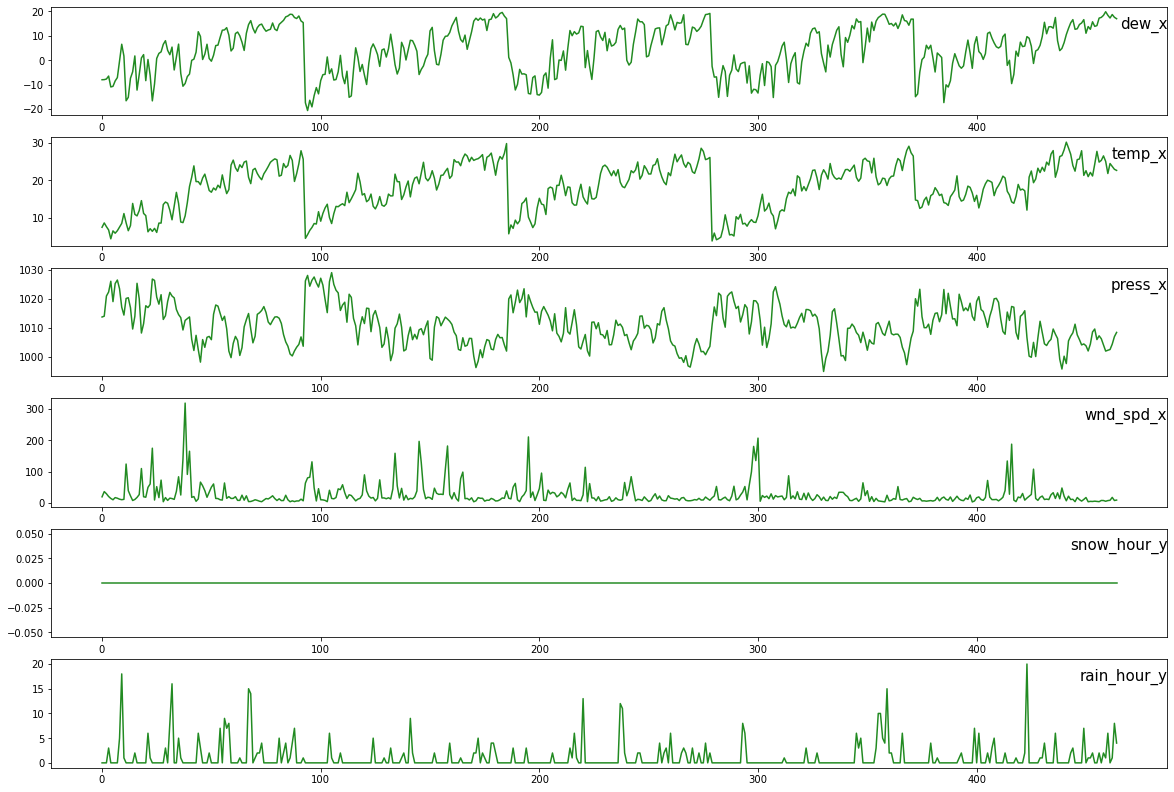

In [39]:
values = spring_all.values

# specify columns to plot
groups = [1, 2, 3,4, 5, 6]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(spring_all.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

In [32]:
summer_b1 = date(2010,6,20)
summer_e1 = date(2010,9,22)
summer_b2 = date(2011,6,20)
summer_e2 = date(2011,9,22)
summer_b3 = date(2012,6,20)
summer_e3 = date(2012,9,22)
summer_b4 = date(2013,6,20)
summer_e4 = date(2013,9,22)
summer_b5 = date(2014,6,20)
summer_e5 = date(2014,9,22)

summer_1 = jahreszeiten[(jahreszeiten.date > summer_b1)&(jahreszeiten.date <summer_e1)]
summer_2 = jahreszeiten[(jahreszeiten.date > summer_b2)&(jahreszeiten.date <summer_e2)]
summer_3 = jahreszeiten[(jahreszeiten.date > summer_b3)&(jahreszeiten.date <summer_e3)]
summer_4 = jahreszeiten[(jahreszeiten.date > summer_b4)&(jahreszeiten.date <summer_e4)]
summer_5 = jahreszeiten[(jahreszeiten.date > summer_b5)&(jahreszeiten.date <summer_e5)]
#print(df_filtered)
print(summer_1.shape)
print(summer_2.shape)
print(summer_3.shape)
print(summer_4.shape)
print(summer_5.shape)
summer_all = pd.concat([summer_1, summer_2, summer_3, summer_4, summer_5])
print(summer_all.shape)
summer_all

(93, 9)
(93, 9)
(93, 9)
(93, 9)
(93, 9)
(465, 9)


,pollution,dew_x,temp_x,press_x,wnd_spd_x,snow_hour_y,rain_hour_y,date,date_datetime
date_datetime,,,,,,,,,
2010-06-21,74.208333,15.375000,25.666667,1003.708333,6.090000,0,1,2010-06-21,2010-06-21
2010-06-22,53.458333,17.041667,26.750000,1004.750000,19.649583,0,1,2010-06-22,2010-06-22
2010-06-23,34.041667,10.958333,25.958333,1009.458333,9.790417,0,0,2010-06-23,2010-06-23
2010-06-24,76.833333,13.041667,26.083333,1008.000000,9.798750,0,0,2010-06-24,2010-06-24
2010-06-25,163.416667,15.708333,25.916667,1008.000000,8.941250,0,0,2010-06-25,2010-06-25
...,...,...,...,...,...,...,...,...,...
2014-09-17,36.666667,11.458333,18.125000,1020.208333,4.861667,0,0,2014-09-17,2014-09-17
2014-09-18,68.750000,10.166667,19.541667,1019.250000,9.483333,0,0,2014-09-18,2014-09-18
2014-09-19,91.750000,13.791667,18.541667,1012.333333,6.053750,0,2,2014-09-19,2014-09-19


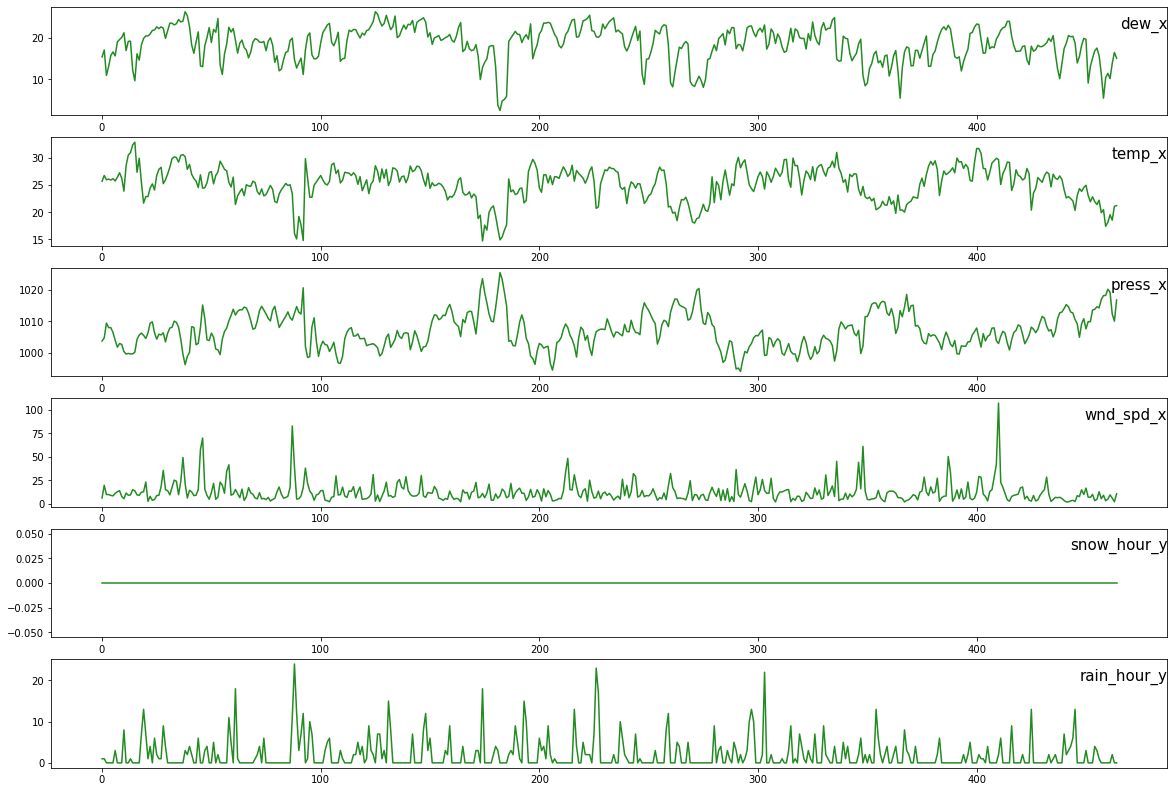

In [38]:
values = summer_all.values

# specify columns to plot
groups = [1, 2, 3,4, 5, 6]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(summer_all.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

In [33]:
autumn_b1 = date(2010,9,22)
autumn_e1 = date(2010,12,20)
autumn_b2 = date(2011,9,22)
autumn_e2 = date(2011,12,20)
autumn_b3 = date(2012,9,22)
autumn_e3 = date(2012,12,20)
autumn_b4 = date(2013,9,22)
autumn_e4 = date(2013,12,20)
autumn_b5 = date(2014,9,22)
autumn_e5 = date(2014,12,20)

autumn_1 = jahreszeiten[(jahreszeiten.date > autumn_b1)&(jahreszeiten.date <autumn_e1)]
autumn_2 = jahreszeiten[(jahreszeiten.date > autumn_b2)&(jahreszeiten.date <autumn_e2)]
autumn_3 = jahreszeiten[(jahreszeiten.date > autumn_b3)&(jahreszeiten.date <autumn_e3)]
autumn_4 = jahreszeiten[(jahreszeiten.date > autumn_b4)&(jahreszeiten.date <autumn_e4)]
autumn_5 = jahreszeiten[(jahreszeiten.date > autumn_b5)&(jahreszeiten.date <autumn_e5)]
#print(df_filtered)
print(autumn_1.shape)
print(autumn_2.shape)
print(autumn_3.shape)
print(autumn_4.shape)
print(autumn_5.shape)
autumn_all = pd.concat([autumn_1, autumn_2, autumn_3, autumn_4, autumn_5])
print(autumn_all.shape)
autumn_all

(88, 9)
(88, 9)
(88, 9)
(88, 9)
(88, 9)
(440, 9)


,pollution,dew_x,temp_x,press_x,wnd_spd_x,snow_hour_y,rain_hour_y,date,date_datetime
date_datetime,,,,,,,,,
2010-09-23,0.000000,7.750000,16.625000,1018.625000,12.290833,0,0,2010-09-23,2010-09-23
2010-09-24,0.000000,10.000000,17.291667,1017.166667,8.658750,0,0,2010-09-24,2010-09-24
2010-09-25,0.000000,11.375000,16.333333,1015.791667,12.718333,0,1,2010-09-25,2010-09-25
2010-09-26,0.000000,6.583333,18.000000,1017.125000,7.098333,0,0,2010-09-26,2010-09-26
2010-09-27,1.875000,1.083333,16.958333,1016.541667,45.946667,0,0,2010-09-27,2010-09-27
...,...,...,...,...,...,...,...,...,...
2014-12-15,88.750000,-16.541667,-0.750000,1028.250000,67.069167,0,0,2014-12-15,2014-12-15
2014-12-16,11.125000,-19.458333,-3.291667,1031.291667,247.548333,0,0,2014-12-16,2014-12-16
2014-12-17,97.708333,-16.000000,-2.916667,1028.708333,29.870833,0,0,2014-12-17,2014-12-17


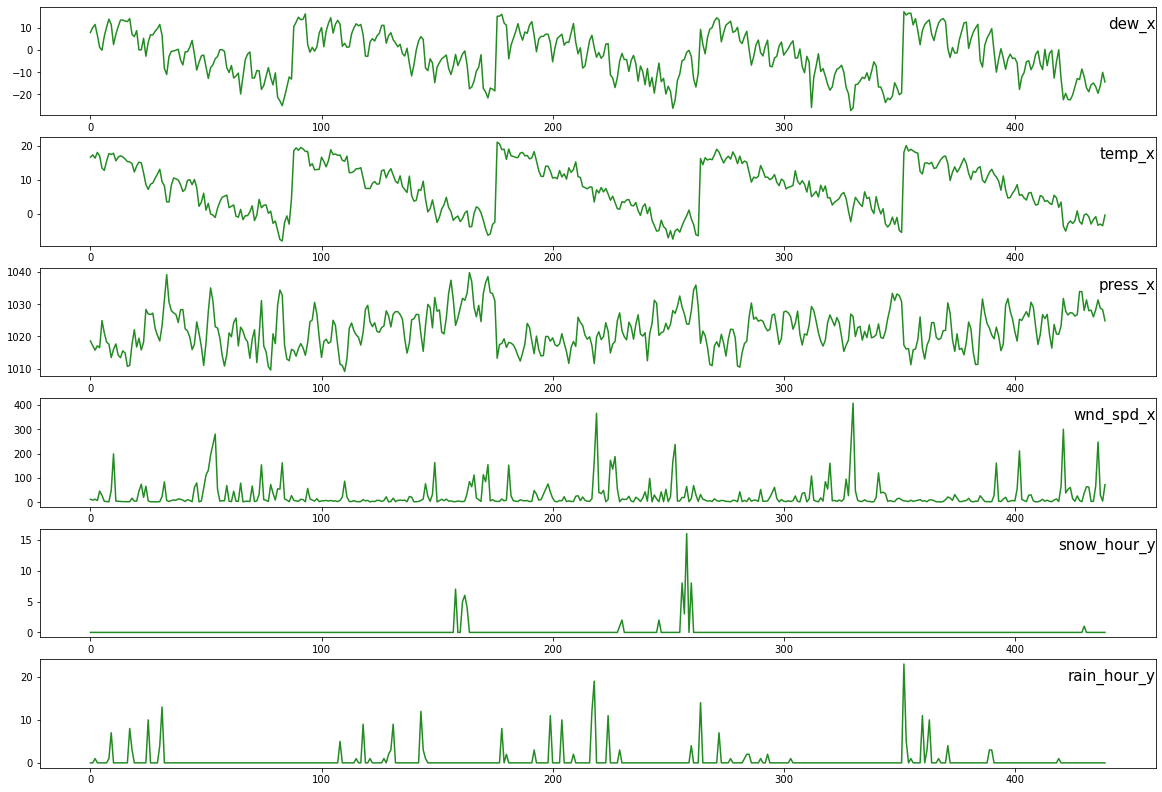

In [37]:
values = autumn_all.values

# specify columns to plot
groups = [1, 2, 3,4, 5, 6]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(autumn_all.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

In [34]:
winter_b0 = date(2009,12,20)
winter_e0 = date(2010,3,22)
winter_b1 = date(2010,12,20)
winter_e1 = date(2011,3,22)
winter_b2 = date(2011,12,20)
winter_e2 = date(2012,3,22)
winter_b3 = date(2012,12,20)
winter_e3 = date(2013,3,22)
winter_b4 = date(2013,12,20)
winter_e4 = date(2014,3,22)
winter_b5 = date(2014,12,20)
winter_e5 = date(2015,3,22)

winter_0 = jahreszeiten[(jahreszeiten.date > winter_b0)&(jahreszeiten.date <winter_e0)]
winter_1 = jahreszeiten[(jahreszeiten.date > winter_b1)&(jahreszeiten.date <winter_e1)]
winter_2 = jahreszeiten[(jahreszeiten.date > winter_b2)&(jahreszeiten.date <winter_e2)]
winter_3 = jahreszeiten[(jahreszeiten.date > winter_b3)&(jahreszeiten.date <winter_e3)]
winter_4 = jahreszeiten[(jahreszeiten.date > winter_b4)&(jahreszeiten.date <winter_e4)]
winter_5 = jahreszeiten[(jahreszeiten.date > winter_b5)&(jahreszeiten.date <winter_e5)]
#print(df_filtered)
print(winter_0.shape)
print(winter_1.shape)
print(winter_2.shape)
print(winter_3.shape)
print(winter_4.shape)
print(winter_5.shape)
winter_all = pd.concat([winter_0, winter_1, winter_2, winter_3, winter_4, winter_5])
print(winter_all.shape)
winter_all

(79, 9)
(91, 9)
(92, 9)
(91, 9)
(91, 9)
(11, 9)
(455, 9)


,pollution,dew_x,temp_x,press_x,wnd_spd_x,snow_hour_y,rain_hour_y,date,date_datetime
date_datetime,,,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,8,0,2010-01-02,2010-01-02
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,22,0,2010-01-03,2010-01-03
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0,0,2010-01-04,2010-01-04
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0,0,2010-01-05,2010-01-05
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0,0,2010-01-06,2010-01-06
...,...,...,...,...,...,...,...,...,...
2014-12-27,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0,0,2014-12-27,2014-12-27
2014-12-28,197.375000,-10.791667,1.583333,1019.958333,10.948750,0,0,2014-12-28,2014-12-28
2014-12-29,159.000000,-12.333333,0.750000,1013.750000,8.000000,0,0,2014-12-29,2014-12-29


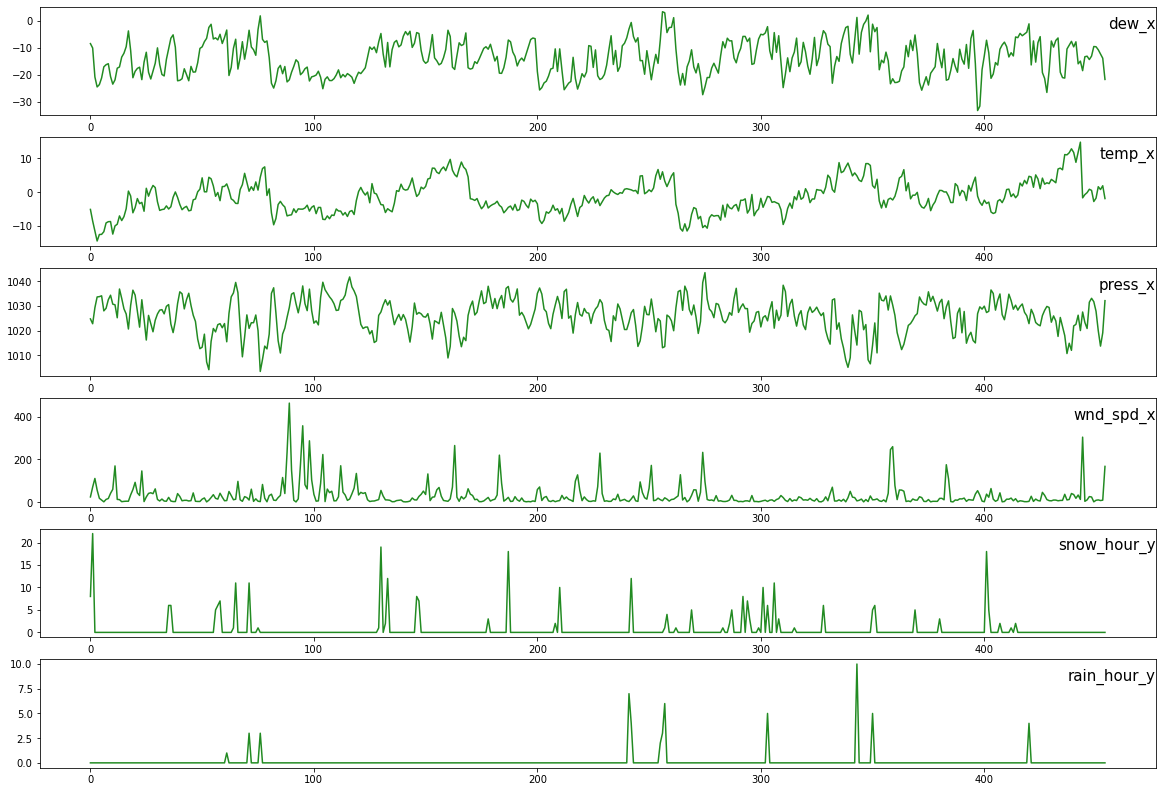

In [36]:
values = winter_all.values

# specify columns to plot
groups = [1, 2, 3,4, 5, 6]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(winter_all.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()